In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)


In [ ]:
x_train[0]

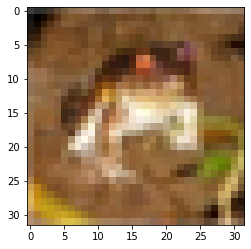

In [5]:
plt.imshow(x_train[0])

In [6]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [7]:
classification[int(y_train[0])]

'frog'

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
model=Sequential()
model.add(Conv2D(32, (5,5), input_shape=(32,32,3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
hist=history = model.fit(x_train, y_train, epochs=4, 
                    validation_data=(x_train, y_train))

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.0519 - accuracy: 0.6365


[1.0519347190856934, 0.6365000009536743]

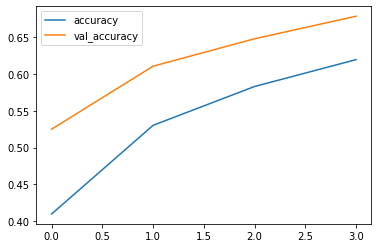

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

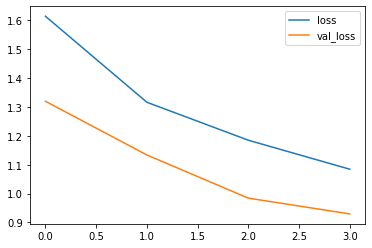

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
img=files.upload()

Saving ship.jfif to ship.jfif


In [ ]:
new_img=plt.imread('/content/image (1).JPG')

In [ ]:
plt.imshow(new_img)

In [ ]:
resize_img=resize(new_img,(32,32,3))
plt.imshow(resize_img)

In [ ]:
predictions=model.predict(np.array([resize_img]))
predictions

In [ ]:
classification[np.argmax(predictions)]